In [1]:
import torch
import torchvision
import gym
import torch.nn.init as init

import random
import torch.nn as nn
import torch
from torch.autograd import Variable
import torch.autograd as autograd
import torch.nn.functional as F
import gym
import random
import heapq
from collections import namedtuple

class v_function(nn.Module):
    def __init__(self):
        super(v_function, self).__init__()
        self.input_len = 1
        self.num_neurons = 20
        self.correct_norm = False
        if self.correct_norm:
            self.batch1 = nn.BatchNorm1d(self.input_len)
        self.linear1 = nn.Linear(self.input_len, self.num_neurons)
        # self.batch1 = nn.BatchNorm1d(40)
        self.linear2 = nn.Linear(self.num_neurons, self.num_neurons, bias=True)
        # self.batch2 = nn.BatchNorm1d(40)
        self.linear3 = nn.Linear(self.num_neurons, self.num_neurons, bias=True)
        # self.batch2 = nn.BatchNorm1d(40)
        self.linear4 = nn.Linear(self.num_neurons, self.num_neurons, bias=True)
        # self.batch2 = nn.BatchNorm1d(40)
        self.linear5 = nn.Linear(self.num_neurons, 1, bias=False)
        # self.dropout = nn.Dropout(p=0.5)

    def forward(self, x_original):
        x = x_original.view(-1, self.input_len)

        if np.isnan(np.sum(x.cpu().numpy())):
            print("some values are nan")
            exit(0)


        

        x = self.linear1(x)

        if np.isnan(np.sum(x.cpu().detach().numpy())):
            print("some values are nan")
            exit(0)


        x = F.tanh(x)
        x = F.tanh(self.linear2(x))
        x = F.tanh(self.linear3(x))
        x = F.tanh(self.linear4(x))

        x = self.linear5(x)
        x = x.view(-1, 1)
        return x
    
Transition = namedtuple('Transition',
                        ('state'))
    
class ReplayMemoryNoReplacement(object):
    
    def __init__(self, capacity):
        self.h = []
        
    def push(self, *args):
        random_index = random.random()
        heapq.heappush(self.h, (random_index, Transition(*args)))
    
    def sample(self, batch_size):
    
        result = []
        for i in range(batch_size):            
            result.append(heapq.heappop(self.h)[1])
        
        return result
    
    def __len__(self):
        return len(self.h)
    
import gym
import numpy as np
import torch.optim as optim
from torch.distributions import Categorical
import random
random.seed(1999)
import math
import torch



# custom weights initialization 
def weights_init_xavier(m):
    classname = m.__class__.__name__
    # print classname
    # print q_net
    if classname.find('Linear') != -1:
        init.xavier_normal_(m.weight.data)
        #m.weight.data.normal_(0.1, 0.2)
        # if not m.bias is None:
        #    m.bias.data.normal_(0.0, 0.02)
        # m.weight.data.uniform_(0.0, 0.02)
        # m.weight.data.fill_(0.1)
        if not m.bias is None:
            # m.bias.data.fill_(0.0)
            m.bias.data.normal_(0.1, 0.2)
            #init.xavier_normal_(m.bias.data)
        print m
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BATCH_SIZE = 20
GAMMA = 0.9
TARGET_UPDATE = 50
PRINT_OUT_TIMES = 1000
v_net = v_function()
v_net.apply(weights_init_xavier)
v_net.to(device)
v_optimizer = optim.Adam(v_net.parameters(), lr=0.00003)
         
use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda == True else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda == True else torch.LongTensor
ByteTensor = torch.cuda.ByteTensor if use_cuda == True else torch.ByteTensor
Tensor = FloatTensor         
         

value_loss_cum = []

def get_expected_value_fixed(s):
    r = 0
    if s == 0:
        r = 0.001
    if s == 1:
        r = 0.092
    elif s == 2:
        r = 0.083
    elif s == 3:
        r = 0.1258
    elif s == 4:
        r = 0.1235
    elif s == 5:
        r = 0.0
    elif s == 6:
        r = 0.1421
    elif s == 7:
        r = 0.0
    elif s == 8:
        r = 0.203364819288
    elif s == 9:
        r = 0.349448651075
    elif s == 10:
        r = 0.393933832645
    elif s == 11:
        r = 0.0
    elif s == 12:
        r = 0.0
    elif s == 13:
        r = 0.565665841103
    elif s == 14:
        r = 0.99
    elif s == 15:
        r = 0.0
    return r
         
NUM_EPISODES =           500000
         

MEMORY_SIZE = 300
memory = ReplayMemoryNoReplacement(MEMORY_SIZE)

cum = []

def optimize():
         
    transitions = memory.sample(BATCH_SIZE)
    batch = Transition(*zip(*transitions))
    tensor_states = FloatTensor(batch.state).view(BATCH_SIZE, 1)
    v_net.train()
    y_hat = v_net(tensor_states)
    
    expected_value_fixed = [get_expected_value_fixed(_st) for _st in batch.state]
    
    expected_value_fixed = FloatTensor(expected_value_fixed).view(BATCH_SIZE,1)    
    
    loss = torch.sum(( y_hat - expected_value_fixed ) ** 2)
    
    v_optimizer.zero_grad()
    loss.backward()
    v_optimizer.step()
    
    cum.append(loss)
    
    return loss
    


Linear(in_features=1, out_features=20, bias=True)
Linear(in_features=20, out_features=20, bias=True)
Linear(in_features=20, out_features=20, bias=True)
Linear(in_features=20, out_features=20, bias=True)
Linear(in_features=20, out_features=1, bias=False)


In [2]:
PRINT_OUT = 10000
k = 0
l = 0
for i in range(NUM_EPISODES):
    
    for j in range(15):
        memory.push(j)
        k += 1
    

    if len(memory) > MEMORY_SIZE:
         l = optimize()
    
    if k % PRINT_OUT == 0:
        print l
    


tensor(1.4552, device='cuda:0')
tensor(1.4005, device='cuda:0')
tensor(0.6267, device='cuda:0')
tensor(0.9005, device='cuda:0')
tensor(0.9033, device='cuda:0')
tensor(0.8605, device='cuda:0')
tensor(0.8858, device='cuda:0')
tensor(0.8918, device='cuda:0')
tensor(0.5055, device='cuda:0')
tensor(0.7106, device='cuda:0')
tensor(0.6511, device='cuda:0')
tensor(0.4872, device='cuda:0')
tensor(0.5246, device='cuda:0')
tensor(0.5727, device='cuda:0')
tensor(0.6474, device='cuda:0')
tensor(0.4968, device='cuda:0')
tensor(0.5212, device='cuda:0')
tensor(0.5475, device='cuda:0')
tensor(0.6197, device='cuda:0')
tensor(0.5064, device='cuda:0')
tensor(0.5380, device='cuda:0')
tensor(0.6585, device='cuda:0')
tensor(0.4955, device='cuda:0')
tensor(0.4420, device='cuda:0')
tensor(0.4546, device='cuda:0')
tensor(0.6378, device='cuda:0')
tensor(0.4688, device='cuda:0')
tensor(0.4806, device='cuda:0')
tensor(0.6268, device='cuda:0')
tensor(0.5546, device='cuda:0')
tensor(0.5117, device='cuda:0')
tensor(0

tensor(1.00000e-02 *
       4.4604, device='cuda:0')
tensor(1.00000e-02 *
       2.0172, device='cuda:0')
tensor(1.00000e-02 *
       2.6572, device='cuda:0')
tensor(1.00000e-02 *
       2.0990, device='cuda:0')
tensor(1.00000e-02 *
       2.5661, device='cuda:0')
tensor(1.00000e-02 *
       3.2794, device='cuda:0')
tensor(1.00000e-02 *
       2.5841, device='cuda:0')
tensor(1.00000e-02 *
       2.8553, device='cuda:0')
tensor(1.00000e-02 *
       2.1062, device='cuda:0')
tensor(1.00000e-02 *
       3.0118, device='cuda:0')
tensor(1.00000e-02 *
       2.4569, device='cuda:0')
tensor(1.00000e-02 *
       2.0253, device='cuda:0')
tensor(1.00000e-02 *
       3.0142, device='cuda:0')
tensor(1.00000e-02 *
       3.1007, device='cuda:0')
tensor(1.00000e-02 *
       2.0052, device='cuda:0')
tensor(1.00000e-02 *
       2.8710, device='cuda:0')
tensor(1.00000e-02 *
       3.4049, device='cuda:0')
tensor(1.00000e-02 *
       2.1063, device='cuda:0')
tensor(1.00000e-02 *
       3.4917, device='cu

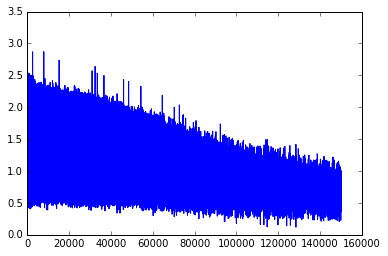

In [12]:
import matplotlib.pyplot as plt

plt.plot(cum)
#plt.plot([1,2,3,4])
plt.show()
# no bias, 3 layer
#lowest is 0.55

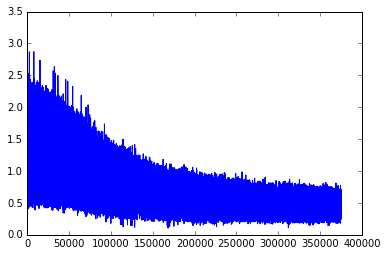

In [18]:
import matplotlib.pyplot as plt

plt.plot(cum)
#plt.plot([1,2,3,4])
plt.show()
# no bias, 3 layer, 500000, steps
#lowest is 0.55

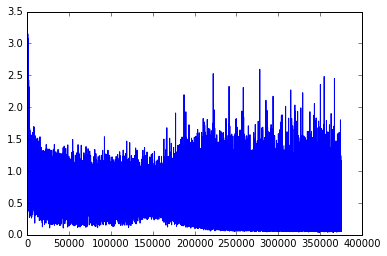

In [26]:
import matplotlib.pyplot as plt

plt.plot(cum)
#plt.plot([1,2,3,4])
plt.show()
# no bias, 3 layer, 500000, steps, batch norm
#lowest is 0.55

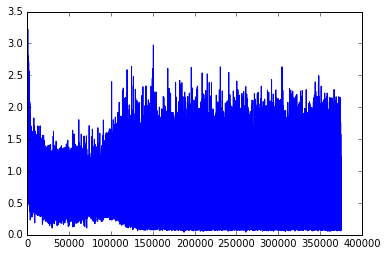

In [36]:
import matplotlib.pyplot as plt

plt.plot(cum)
#plt.plot([1,2,3,4])
plt.show()
# no bias, 3 layer, 500000, steps, batch norm, dropout
#lowest is 0.55

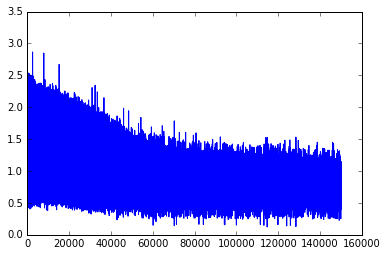

In [15]:
import matplotlib.pyplot as plt

plt.plot(cum)
#plt.plot([1,2,3,4])
plt.show()
# WITH bias, 3 layer
#lowest is 0.55

In [33]:
eval_error = []
def evalu():
         
    transitions = memory.sample(BATCH_SIZE)
    batch = Transition(*zip(*transitions))
    tensor_states = FloatTensor(batch.state).view(BATCH_SIZE, 1)
    v_net.eval()
    y_hat = v_net(tensor_states)
    
    expected_value_fixed = [get_expected_value_fixed(_st) for _st in batch.state]
    
    expected_value_fixed = FloatTensor(expected_value_fixed).view(BATCH_SIZE,1)    
    
    loss = torch.sum(( y_hat - expected_value_fixed ) ** 2)
    
    
    
    eval_error.append(loss)
    
    return loss

In [34]:
PRINT_OUT = 10000
k = 0
l = 0

for i in range(NUM_EPISODES):
    
    for j in range(15):
        memory.push(j)
        k += 1
    

    if len(memory) > MEMORY_SIZE:
         l = evalu()
    
    if k % PRINT_OUT == 0:
        print l

tensor(0.1054, device='cuda:0')
tensor(0.1131, device='cuda:0')
tensor(0.1040, device='cuda:0')
tensor(1.00000e-02 *
       9.4990, device='cuda:0')
tensor(0.1265, device='cuda:0')
tensor(0.1289, device='cuda:0')
tensor(0.1123, device='cuda:0')
tensor(1.00000e-02 *
       9.1010, device='cuda:0')
tensor(0.1056, device='cuda:0')
tensor(0.1024, device='cuda:0')
tensor(0.1125, device='cuda:0')
tensor(0.1374, device='cuda:0')
tensor(0.1104, device='cuda:0')
tensor(0.1169, device='cuda:0')
tensor(1.00000e-02 *
       9.8110, device='cuda:0')
tensor(0.1018, device='cuda:0')
tensor(0.1036, device='cuda:0')
tensor(0.1285, device='cuda:0')
tensor(0.1188, device='cuda:0')
tensor(1.00000e-02 *
       8.9630, device='cuda:0')
tensor(1.00000e-02 *
       8.9425, device='cuda:0')
tensor(0.1290, device='cuda:0')
tensor(0.1134, device='cuda:0')
tensor(0.1501, device='cuda:0')
tensor(0.1171, device='cuda:0')
tensor(0.1053, device='cuda:0')
tensor(0.1263, device='cuda:0')
tensor(0.1209, device='cuda:0')

KeyboardInterrupt: 

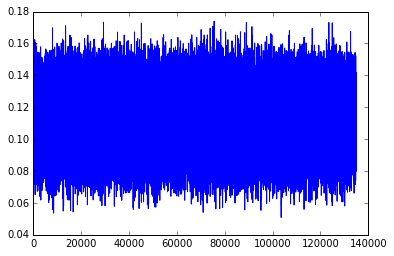

In [35]:
import matplotlib.pyplot as plt

plt.plot(eval_error)
#plt.plot([1,2,3,4])
plt.show()
# no bias, 3 layer, 500000, steps, batch norm, dropout
#lowest is 0.55

In [5]:
def print_v_table():
    for i in range(16):
        st = np.array(i)
        st = np.expand_dims(st, axis=0)
        v_net.eval()
        action_probs = v_net(FloatTensor(st))
        #action_probs = F.softmax(action_probs, dim=1)
        outp = " state (" +str(i) + ") "
        n = 0
        for tensr in action_probs:
            for cell in tensr:
                outp = outp + " A[" + str(n) + "]:(" + str(cell.item()) + ")"
                n += 1
        print(outp)

def print_pi_table():
    for i in range(16):
        st = np.array(i)
        st = np.expand_dims(st, axis=0)
        pi_net.eval()
        action_probs = pi_net(FloatTensor(st))
        action_probs = F.softmax(action_probs, dim=1)
        outp = " state (" +str(i) + ") "
        n = 0
        for tensr in action_probs:
            for cell in tensr:
                outp = outp + " A[" + str(n) + "]:(" + str(cell.item()) + ")"
                n += 1
        print(outp)

In [32]:
print_v_table()

 state (0)  A[0]:(0.0689634233713)
 state (1)  A[0]:(0.072984226048)
 state (2)  A[0]:(0.0779913142323)
 state (3)  A[0]:(0.0844097137451)
 state (4)  A[0]:(0.0929350554943)
 state (5)  A[0]:(0.104738414288)
 state (6)  A[0]:(0.121835201979)
 state (7)  A[0]:(0.147716730833)
 state (8)  A[0]:(0.188223198056)
 state (9)  A[0]:(0.251371860504)
 state (10)  A[0]:(0.317336767912)
 state (11)  A[0]:(0.0322879850864)
 state (12)  A[0]:(0.10173715651)
 state (13)  A[0]:(0.451440483332)
 state (14)  A[0]:(0.938364863396)
 state (15)  A[0]:(1.40254056454)
